## Real-time Insights from Social Media Data

### Project Description
<p> Social media has changed our basic human needs and these baits are keeping us hooked and engaged. Twitter is a master at this game. Data from Twitter-storms is available in near real-time. This means we can learn about the big waves of thoughts and moods around the world as they arise. </p>

### Purpose
<p> The purpose of this object is to extract insights from social media data and be able to tell a story from the results. </p>

### Data
<p> For the analysis, I use the datas “USTrends.json”, "WWTrends.json" and "WeLoveTheEarth.json".</p>
<p> Twitter provides both global and local trends. “USTrends.json” and "WWTrends.json" contain topics that were hot in the United States(US) and worldwide(WW).</p>
<p> "WeLoveTheEarth.json" contains the posts data about the hot-trend hashtag "WeLoveTheEarth".

### Import library

In [30]:
import json
import matplotlib.pyplot as plt
import pandas as pd

### Import data

In [2]:
WW_trends = json.loads(open("WWTrends.json").read())
US_trends = json.loads(open("USTrends.json").read())

In [38]:
WW_trends[0:1]

[{'trends': [{'name': '#BeratKandili',
    'url': 'http://twitter.com/search?q=%23BeratKandili',
    'promoted_content': None,
    'query': '%23BeratKandili',
    'tweet_volume': 46373},
   {'name': '#GoodFriday',
    'url': 'http://twitter.com/search?q=%23GoodFriday',
    'promoted_content': None,
    'query': '%23GoodFriday',
    'tweet_volume': 81891},
   {'name': '#WeLoveTheEarth',
    'url': 'http://twitter.com/search?q=%23WeLoveTheEarth',
    'promoted_content': None,
    'query': '%23WeLoveTheEarth',
    'tweet_volume': 159698},
   {'name': '#195TLdenTTVerilir',
    'url': 'http://twitter.com/search?q=%23195TLdenTTVerilir',
    'promoted_content': None,
    'query': '%23195TLdenTTVerilir',
    'tweet_volume': None},
   {'name': '#AFLNorthDons',
    'url': 'http://twitter.com/search?q=%23AFLNorthDons',
    'promoted_content': None,
    'query': '%23AFLNorthDons',
    'tweet_volume': None},
   {'name': 'Shiv Sena',
    'url': 'http://twitter.com/search?q=%22Shiv+Sena%22',
    'pro

### Finding common trends

In [12]:
world_trend = set()
for trend in WW_trends[0]["trends"]:
    world_trend.add(trend["name"])
us_trend = set()
for trend in US_trends[0]["trends"]:
    us_trend.add(trend["name"])

# getting intersection of two sets
common_trends = world_trend.intersection(us_trend)
common_trends

{'#AFLNorthDons',
 '#BLACKPINKxCorden',
 '#ConCalmaRemix',
 '#DinahJane1',
 '#DragRace',
 '#NRLBulldogsSouths',
 '#WeLoveTheEarth',
 'Derrick White',
 'Derry',
 'Lil Dicky',
 'Lyra McKee'}

### Explore the hot-trend

In [39]:
# Look into the hashtag #WeLoveTheEarth.
tweets = json.loads(open("WeLoveTheEarth.json").read())
tweets[0:1]

[{'created_at': 'Fri Apr 19 08:46:48 +0000 2019',
  'id': 1119160405270523904,
  'id_str': '1119160405270523904',
  'text': 'RT @lildickytweets: 🌎 out now #WeLoveTheEarth https://t.co/L22XsoT5P1',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'WeLoveTheEarth', 'indices': [30, 45]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'lildickytweets',
     'name': 'LD',
     'id': 1209516660,
     'id_str': '1209516660',
     'indices': [3, 18]}],
   'urls': [{'url': 'https://t.co/L22XsoT5P1',
     'expanded_url': 'https://youtu.be/pvuN_WvF1to',
     'display_url': 'youtu.be/pvuN_WvF1to',
     'indices': [46, 69]}]},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 212

In [15]:
# Extract the text from the tweets
text = []
for tweet in tweets:
    text.append(tweet["text"])

# Extract the screen names of users tweeting about #WeLoveTheEarth
names = []
for tweet in tweets:
    for user_mention in tweet["entities"]["user_mentions"]:
        names.append(user_mention["screen_name"])
        
# Extracting all the hashtags being used when talking about this topic
hashtags = []
for tweet in tweets:
    for hashtag in tweet["entities"]["hashtags"]:
        hashtags.append(hashtag["text"])

In [19]:
print(names[:10])
print(hashtags[:10])

['lildickytweets', 'cabeyoomoon', 'Spotify', 'lildickytweets', 'justinbieber', 'ArianaGrande', 'halsey', 'sanbenito', 'edsheeran', 'SnoopDogg']
['WeLoveTheEarth', 'WeLoveTheEarth', 'WeLoveTheEarth', 'EARTH', 'WeLoveTheEarth', 'WeLoveTheEarth', 'WeLoveTheEarth', 'EdSheeranTheKoala', 'WeLoveTheEarth', 'WeLoveTheEarth']


### Frequency analysis

In [26]:
# Import module
from collections import Counter

for item in [names, hashtags]:
    c = Counter(item)
    print(c.most_common(10), "\n")

[('lildickytweets', 102), ('LeoDiCaprio', 44), ('ShawnMendes', 33), ('halsey', 31), ('ArianaGrande', 30), ('justinbieber', 29), ('Spotify', 26), ('edsheeran', 26), ('sanbenito', 25), ('SnoopDogg', 25)] 

[('WeLoveTheEarth', 313), ('4future', 12), ('19aprile', 12), ('EARTH', 11), ('fridaysforfuture', 10), ('EarthMusicVideo', 3), ('ConCalmaRemix', 3), ('Earth', 3), ('aliens', 2), ('AvengersEndgame', 2)] 



### Activities around the trend

In [40]:
retweet = []
for tweet in tweets:
    if "retweeted_status" in tweet:
        retweet.append((tweet["retweet_count"], tweet["retweeted_status"]["favorite_count"], tweet["retweeted_status"]["user"]["followers_count"], tweet["retweeted_status"]["user"]["screen_name"], tweet["text"]))

In [49]:
data = pd.DataFrame(retweet, columns=['Retweets','Favorites', 'Followers', 'ScreenName', 'Text'])
data = data.groupby(["ScreenName", "Text", "Followers"]).agg(sum)
data = data.sort_values(["Followers","Favorites","Retweets"], ascending = False)
data.head(10)

Retweets  \
ScreenName   Text                                               Followers             
katyperry    RT @katyperry: Sure, the Mueller report is out,... 107195569      2338   
                                                                107195568      2338   
TheEllenShow RT @TheEllenShow: .@lildickytweets, @justinbieb... 77474826       2432   
LeoDiCaprio  RT @LeoDiCaprio: Thank you to @lildickytweets a... 18988898     149992   
             RT @LeoDiCaprio: The @dicapriofdn partners that... 18988898      28505   
halsey       RT @halsey: 🐯🐯🐯 meeeeeeeow 👅 #WeLoveTheEarth ht... 10564842       7742   
                                                                10564841       7742   
scooterbraun RT @scooterbraun: Watch #EARTH NOW! #WeLoveTheE... 3885179        5925   
Spotify      RT @Spotify: This is epic. @lildickytweets got ... 2973277      107222   
TomHall      RT @TomHall: 🐆\n\nLook Out!\n\n🐆\n\n#Cheetah @L... 590841           82   

                                                                           Favorites  
ScreenName   Text                                               Followers             
katyperry    RT @katyperry: Sure, the Mueller report is out,... 107195569      10557  
                                                                107195568      10556  
TheEllenShow RT @TheEllenShow: .@lildickytweets, @justinbieb... 77474826       10086  
LeoDiCaprio  RT @LeoDiCaprio: Thank you to @lildickytweets a... 18988898      416018  
             RT @LeoDiCaprio: The @dicapriofdn partners that... 18988898       78137  
halsey       RT @halsey: 🐯🐯🐯 meeeeeeeow 👅 #WeLoveTheEarth ht... 10564842       69684  
                                                                10564841       69682  
scooterbraun RT @scooterbraun: Watch #EARTH NOW! #WeLoveTheE... 3885179        14635  
Spotify      RT @Spotify: This is epic. @lildickytweets got ... 2973277       237259  
TomHall      RT @TomHall: 🐆\n\nLook Out!\n\n🐆\n\n#Cheetah @L... 590841           252

#### From the table:
* Even if celebrities like Katy Perry and Ellen have a huge Twitter following, their followers hardly reacted, e.g., only 0.0098% of Katy's followers liked her tweet.
* Lil Dicky's followers reacted the most — 42.4% of his followers liked his first tweet.
* While Leo got the most likes and retweets in terms of counts, his first tweet was only liked by 2.19% of his followers.

### Analyzing used language

In [35]:
language = []
for tweet in tweets:
    language.append(tweet["lang"])

(array([303., 107.,  22.,  14.,  36.,  32.,   3.,   2.,   1.,   2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

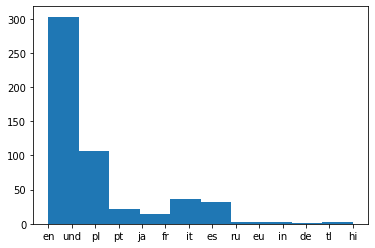

In [36]:
plt.hist(language)

### From the chart:
* Most of the tweets were in English.
* Polish, Italian and Spanish were the next runner-ups.
* There were a lot of tweets with a language alien to Twitter (lang = 'und').